<a href="https://colab.research.google.com/github/mjvakili/MLcourse/blob/master/day5/k_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt

#$k$-means

The goal of the $k$-means clustering algorithm to find a partitioning of a given dataset ($\{x_i\}_{i=1}^{N} \; ; x_{i} \in R^{D}$) into a finite number $K$ of clusters. 

Each data $x_{n}$ is assined to one-and only one cluster $k$, such that the distances between the points inside a cluster is smaller their distances to the points outside the cluster.


$\{x_{i}\}_{i=1}^{N} \rightarrow C_{k}, \; k = 1,..,K$


Consider the following example:

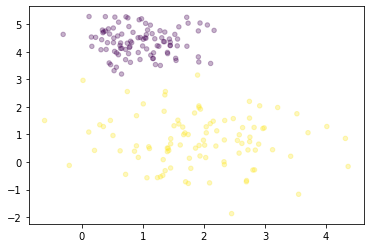

In [65]:
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=200, centers=2,
                       cluster_std=[0.5, 1], random_state=0)
plt.scatter(X[:, 0], X[:, 1], c= y_true, alpha = 0.3, s = 20)

In this example we have two randomly generated *blobs* of points that are scattered, with different amounts, around two centers on the two dimensional Euclidean space. 


In the $k$-means algorithm, there are two sets of variables: 

(1) $K$ cluster centers (cluster means): $\mu_{k}, \; k = 1, ..., K$ 

(2) A matrix that assigns the datapoints to the $K$ cluster centers:  $
    r_{ik}= 
\begin{cases}
    1, & \text{if } x_{i} \in C_{k}\\
    0,              & \text{otherwise}
\end{cases}
$

In summary, we have two tasks: $\begin{cases}
    \text{(1) Choosing the optimal cluster means} \\
    \text{(2) Choosing the optimal cluster assignment}
\end{cases}
$

These two tasks can be achieved by minimizing the following sum of the square distances between the points and the cluster centers:

$E = \sum_{i=1}^{N} \sum_{k=1}^{K} \; r_{ik} || x_{i} - \mu_{k}||^{2}$.

In other words, minimization of $E$ will provide us with the optimal $r_{ik}$ and $\mu_{k}$. 

#Optimization procedure:

(1) Choose som initial values for the cluster centers $\{\mu_k\}$;

(2) Repeat 

$
\begin{cases}
    \text{For} \; i \in {i,..., N}: \begin{cases}r_{ik} = 1 \;\; \text{if} \; k = \text{argmin}_j ||x_{i} -\mu_{j}||^2,  \\ 
    r_{ik} = 0 \;\; \text{if otherwise}\end{cases} 
    \\
    \mu_{k} = \frac{\sum_{i \in C_{k}}r_{ik}x_{i}}{\sum_{i \in C_{k}} r_{ik}}
\end{cases}
$

The step (2) is repeated until $E$ is converged, or equivalently, until there are no further changes to the cluster means and the cluster assignments. 
The computational complexity of the above operation is $O(NK)$, where $N$ is the number of data points and $K$ is the number of clusters.


In [0]:
from sklearn.metrics import pairwise_distances_argmin

initial choice of cluster centers 
 [[1.44134538 1.08674162]
 [1.64409021 1.72174811]]


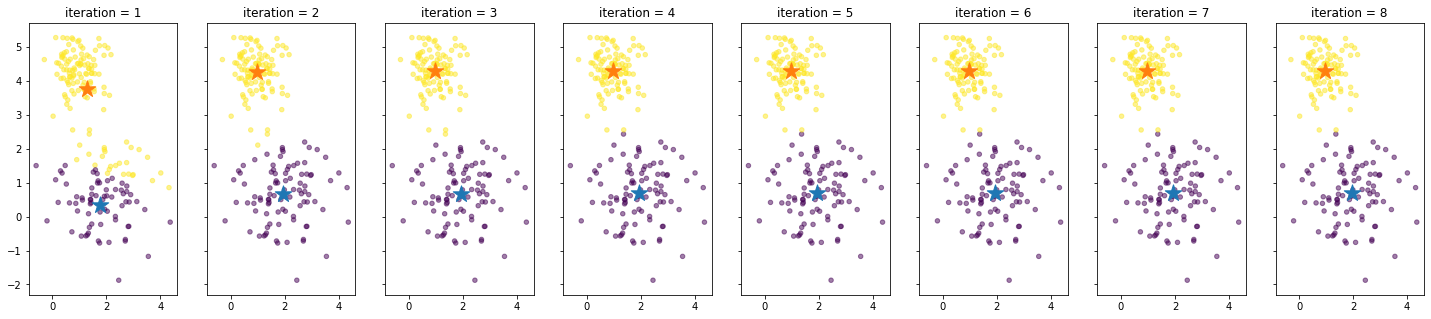

In [74]:
centers = [1,1] + np.random.rand(2,2)
print("initial choice of cluster centers \n", centers)
fig, axs = plt.subplots(nrows = 1, ncols = 8, figsize = (25, 5), sharey = True)
for i in range(8):
    y_est = pairwise_distances_argmin(centers, X, axis = 0)
    centers = np.array([np.mean(X[y_est == a, :], axis = 0) for a in np.unique(y_est)])
    axs[i].scatter(X[:,0], X[:,1], c = y_est, alpha  = 0.5, s = 20)
    for j in range(2):
        axs[i].scatter(centers[j,0], centers[j,1], marker = "*", s = 300)
        axs[i].set_title("iteration = "+str(i+1))